In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots in this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: magrittr



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server. This is one of the main feature of CAVAanalytics

In [2]:
# this function has several arguments. To load CORDEX-CORE data simply specify path.to.data as CORDEX-XORE and the
# domain of interest. For example Sudan is in the African domain. 
# You can check the domain here (https://www.researchgate.net/figure/The-ten-CORDEX-CORE-model-domains-simulated-by-the-model-REMO-North-America-NAM_fig1_337370761)
# if you want to also load observatipnal data, simply specify W5E5 in path.to.obs and years.hist. 
# When you specify years.hist, you would automatically load the historical simulations run of CORDEX-CORE.
# aggr.m allows user to perform monthly aggregation if daily values are not needed. 
# This is almost always the case except when calculation of agroclimatic indicators is needed. 

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2050, 
                   years.hist = 2000,
                   path.to.obs = NULL, buffer = 0, domain = "AFR-22", xlim=NULL, ylim=NULL, aggr.m="none")


2023-05-12 14:43:41 Retrieving CORDEX-CORE data, RCM RegCM4. This may take a while... 


2023-05-12 14:43:43 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:44:15 Done


2023-05-12 14:43:44 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:44:10 Done


2023-05-12 14:43:45 Loading CORDEX-AFR-22_NCC-NorESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:44:16 Done


2023-05-12 14:44:16 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:55:21 Done


2023-05-12 14:44:17 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:56:11 Done


2023-05-12 14:44:17 Loading CORDEX-AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 14:56:16 Done


2023-05-12 14:56:17 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 15:05:13 Done


2023-05-12 14:56:17 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_

## 2nd step: trends
trends is one of the function available in step 2 of the CAVAanalytics framework. As the name gives away, it is used to look at trends (both for observation or future projections). This function needs at least 25 years of data to run otherwise it will through an error. The main issue that this function try to address is how to calculate a global p value for a multimodel ensemble. This fuciton uses a form of multivariate statistic based on design inference to address the problem. Full documentation of how this works can be found in [Wang et al., 2012 ](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2012.00190.x). More of this when we plot the results

In [6]:
exmp1_trends <- trends(exmp1, season=1:12, interannual_var = FALSE,  historical=FALSE, 
                       bias.correction = FALSE,uppert = NULL, lowert = NULL, consecutive=FALSE, duration="max"
                      )

2023-05-12 16:17:11 trends, projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of yearly increase in total  pr

2023-05-12 16:18:05 Processing rcp26

2023-05-12 16:18:05 Applying linear regression to the ensemble. Global test statistics calculated assuming uncorrelated response (for faster computation). P-value calculated using 999 iterations via PIT-trap resampling.

2023-05-12 16:19:35 Processing rcp85

2023-05-12 16:19:35 Applying linear regression to the ensemble. Global test statistics calculated assuming uncorrelated response (for faster computation). P-value calculated using 999 iterations via PIT-trap resampling.

2023-05-12 16:21:06 Processing rcp26

2023-05-12 16:21:06 Applying linear regression to each ensemble member. P-value calculated using 999 iterations via residual (without replacement) resampling.

2023-05-12 16:23:18 Done

2023-05-12 16:23:18 Processing rcp85

2023-05-12 16:23:18 Applying linear regression to each ensemble member. P-value calculated using 99

## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way


2023-05-12 12:06:44 Visualizing ensemble 

2023-05-12 12:06:44 Prepare for plotting

2023-05-12 12:06:44 Done



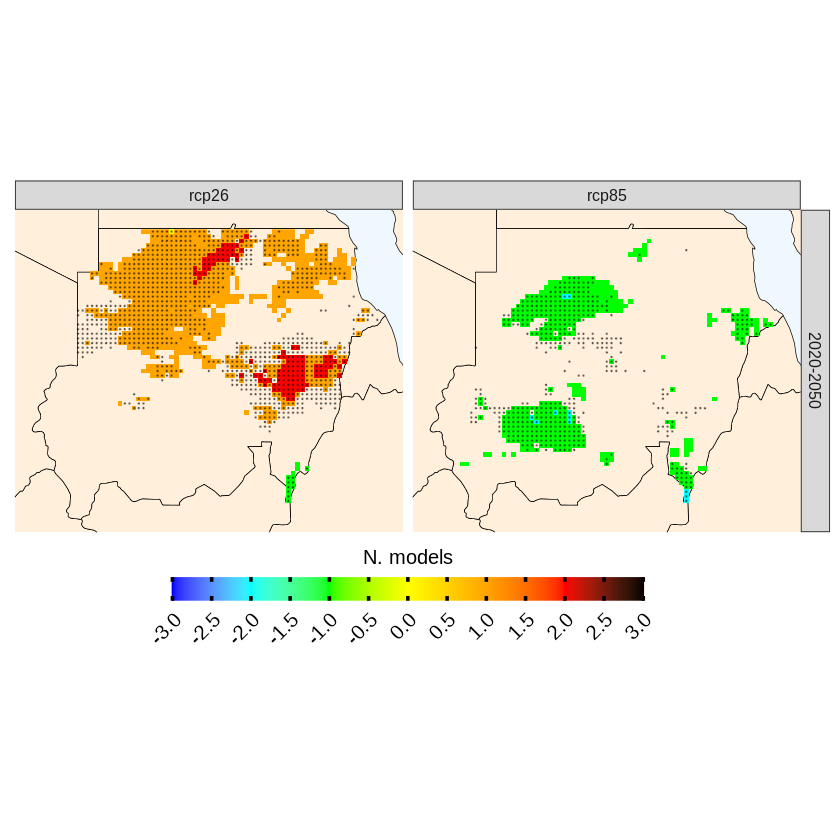

In [6]:
# here we are plotting the overall direction of change (increase or decrease) in total precipitation 
# based on the multimodel ensemble. The black dot is indicating the global p.value calculated based on multivariate linear models
# while the color indicates the number of models which agree on the direction of change

plotting(exmp1_trends, ensemble = T, frequencies = F, plot_titles="N. models change direction")

2023-05-12 12:13:23 Visualizing individual members 

2023-05-12 12:13:23 Prepare for plotting

2023-05-12 12:13:23 Done



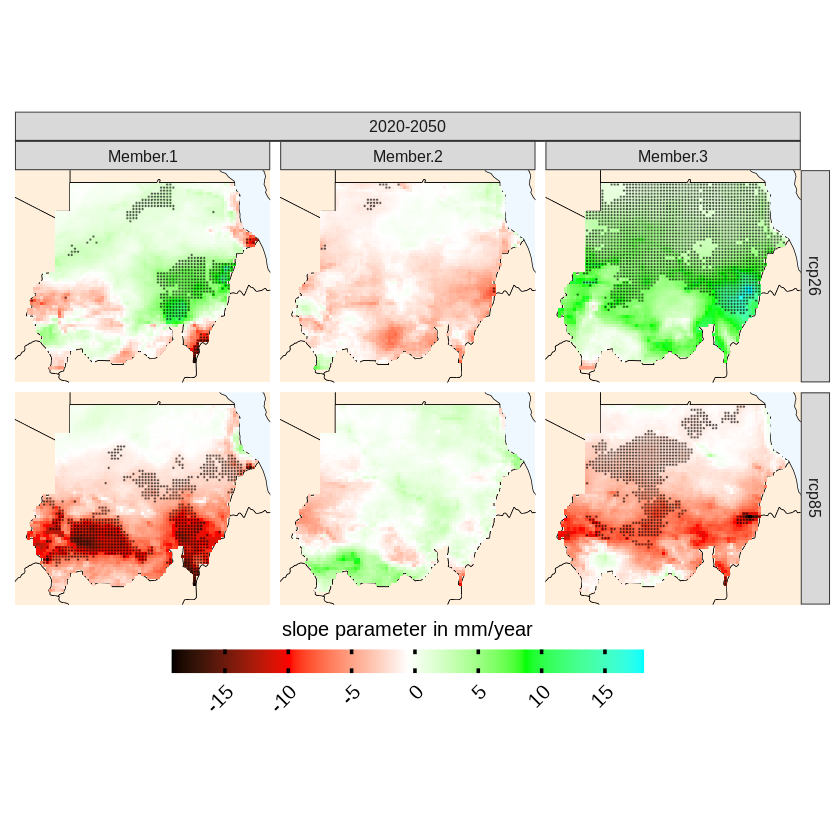

In [9]:
# If you want to know the actual estimate of the slope parameter, you can do that by looking at the individual models.
# As always you can change the colors if you want to
plotting(exmp1_trends, ensemble = FALSE, frequencies = F, plot_titles="slope parameter in mm/year", 
         palette = c("black", "red", "white", "green", "cyan"))

2023-05-12 16:25:41 Visualizing ensemble, frequencies 

2023-05-12 16:25:41 Prepare for plotting

2023-05-12 16:25:41 Arguments bins, legend_range, plot_titles and palette are ignored

Picking joint bandwidth of 56.4

Picking joint bandwidth of 55.5



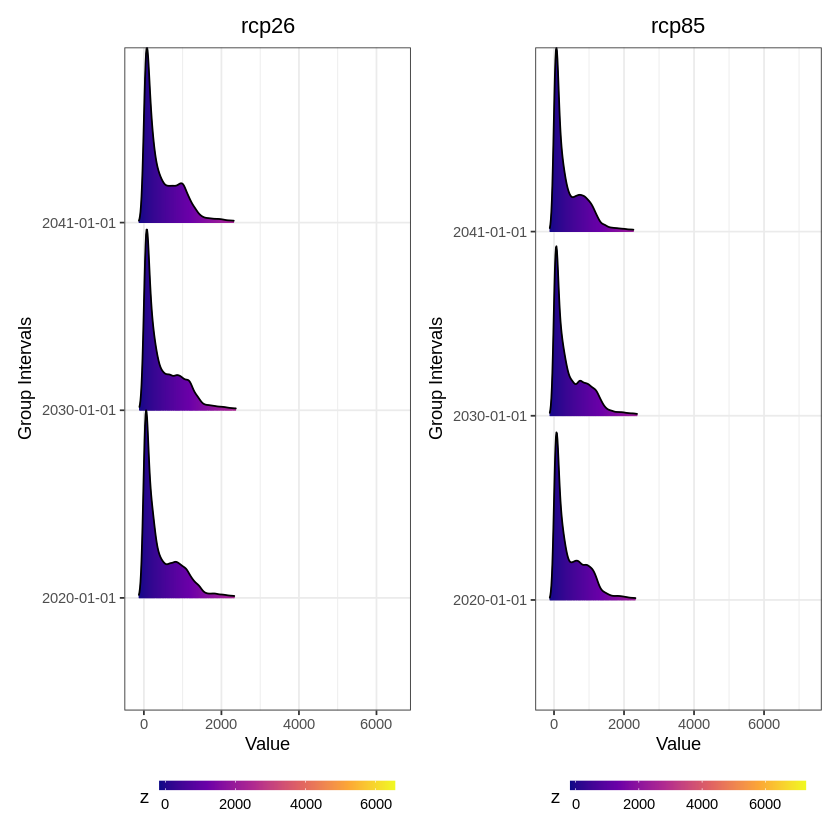

In [10]:
# what if you want to appreciate spatial temporal differences based on frequencies? You can do this as follow
plotting(exmp1_trends, ensemble = TRUE, frequencies = T)


2023-05-12 16:25:45 Visualizing individual members (frequencies)

2023-05-12 16:25:45 Prepare for plotting

2023-05-12 16:25:45 Arguments bins, legend_range, plot_titles and palette are ignored

Picking joint bandwidth of 66.7

Picking joint bandwidth of 57.3

Picking joint bandwidth of 45.7

Picking joint bandwidth of 65.3

Picking joint bandwidth of 57.5

Picking joint bandwidth of 44.6



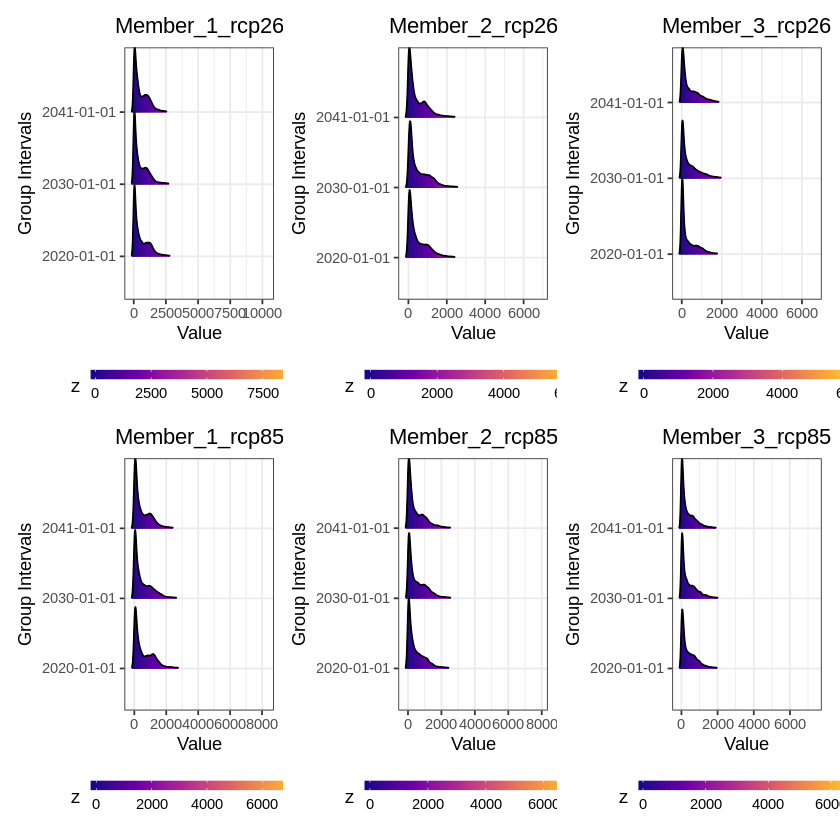

In [11]:
plotting(exmp1_trends, ensemble = FALSE, frequencies = T)

## What happen if we want to perform a calculation on a large area?
The above functions are quite memory intensive. This of course depends on how many years of data you are loading but also on the size of the region. If you are using your normal laptop, it is likely that you have available only 16Gb RAM. Even the above operations could potentially fail. You can monitor your RAM usage using htop or bashtop in linux OS.

To solve this issue, we combined the load_data step with the 2nd step so that the loading and calculations are performed sequentially on small chunks of spatial data. At the end of the process, the small rasters are merged together. Because the operations is performed sequentially, while slow, it saves memory allowing users to analyse entire CORDEX domains

In [11]:
exmp1_chunk <- load_data_and_trends(path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2050, 
                   years.hist = 2000, domain = "AFR-22", 
                xlim = c(10,50), ylim = c(-10,10), aggr.m="sum", season=1:12, 
                                        chunk.size=20, interannual_var=F)


2023-05-15 15:43:01 CHUNK_1_1


2023-05-15 15:43:01 Retrieving CORDEX-CORE data, RCM RegCM4. This may take a while... 


2023-05-15 15:43:03 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:43:50 Done


2023-05-15 15:43:04 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:43:48 Done


2023-05-15 15:43:06 Loading CORDEX-AFR-22_NCC-NorESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:43:52 Done


2023-05-15 15:43:53 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:55:42 Done


2023-05-15 15:43:53 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:55:53 Done


2023-05-15 15:43:54 Loading CORDEX-AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 15:56:51 Done


2023-05-15 15:56:52 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_v0

2023-05-15 16:08:05 Done


2023-05-15 15:56:52 Loading CORDEX-AFR-22_MPI-M-MPI-E

2023-05-17 08:34:09 Visualizing ensemble 

2023-05-17 08:34:09 Prepare for plotting

2023-05-17 08:34:09 Done



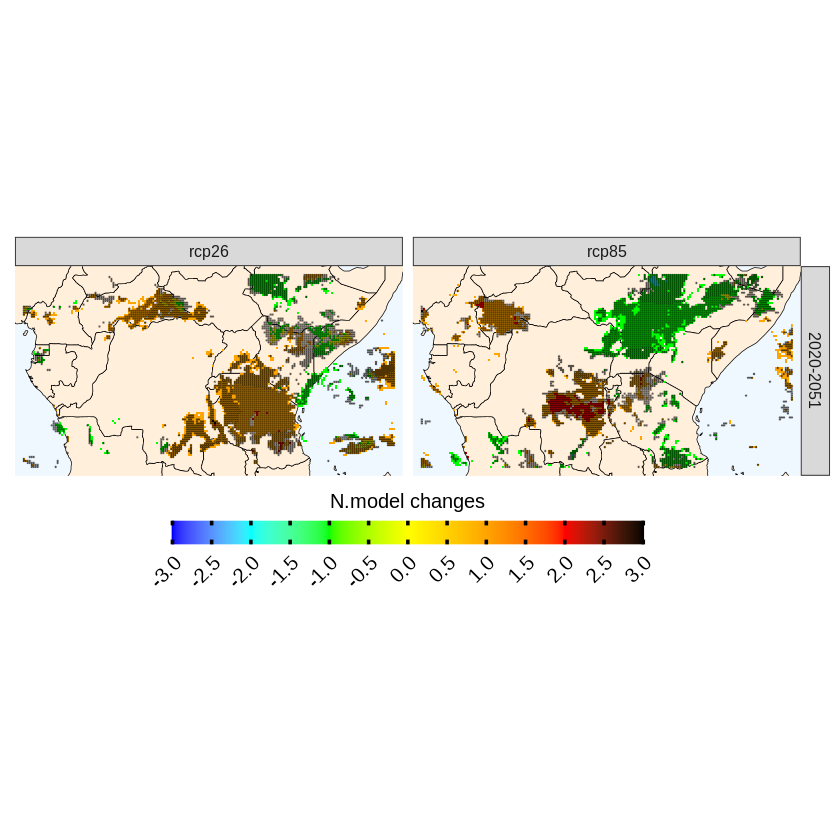

In [15]:
plotting(exmp1_chunk, ensemble = T, frequencies = F, plot_titles = "N.model changes")